In [7]:
import DPP_csv as DPP
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

In [8]:
data_dir = input("Enter the filepath of the csv file: ")

Enter the filepath of the csv file: dataOut.csv


In [9]:
data_frac = float(input("Enter the fraction(0 to 1) of the data to be collected: "))
if not 0< data_frac <=1:
    print("Invalid fraction. Default of 30% of data will be used.")
    data_frac = 0.2
print("%.2f %% of data will be used."% (data_frac*100))
dpp = DPP.DPP_csv(data_dir)
df,window_df, chosen_attributes = dpp.get_data(data_frac = data_frac)
window_df.head()

Enter the fraction(0 to 1) of the data to be collected: 0.2
20.00 % of data will be used.
222
1 motionGravityY
2 motionGravityZ
3 motionGravityX
4 motionRotationRateZ
5 gyroRotationY
6 motionRotationRateY
7 gyroRotationX
8 motionRotationRateX
9 gyroRotationZ
10 gyroTimestamp
11 motionMagneticFieldY
12 magneticFieldX
13 magneticFieldY
14 motionMagneticFieldZ
15 motionMagneticFieldX
16 magneticFieldZ
17 motionMagneticFieldCalibrationAccuracy
18 locationCourse
19 locationHorizontalAccuracy
20 locationHeadingY
21 locationLongitude
22 locationVerticalAccuracy
23 locationSpeed
24 locationTrueHeading
25 locationAltitude
26 locationTimestamp
27 locationLatitude
28 locationHeadingTimestamp
29 locationHeadingX
30 locationMagneticHeading
31 locationHeadingZ
32 locationHeadingAccuracy
33 accelerometerAccelerationX
34 motionUserAccelerationX
35 accelerometerTimestamp
36 motionUserAccelerationZ
37 accelerometerAccelerationZ
38 accelerometerAccelerationY
39 motionUserAccelerationY
40 orientationAzimu

AssertionError: 29 columns passed, passed data had 2 columns

In [8]:
n_clusters = int(input("Enter the number of clusters: "))
kmeans = KMeans(n_clusters)
kmeans.fit(np.array(df))
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

Enter the number of clusters: 4


In [9]:
X = np.array(df)
X_w_centroids = np.concatenate((X,centroids),axis=0)
init_dim = len(df.columns)
red_dim = 2

In [10]:
import Sachin_som_with_TF as som
import tsne

som_data = np.copy(X_w_centroids)
tsne_data = np.copy(X_w_centroids)

In [11]:
som = som.SOM(20,20,init_dim,200)
som.train(X_w_centroids)
print("SOM training is done.")
mapped = np.array(som.map_vects(som_data))
som_redu_centroids = mapped[-n_clusters:]
som_wo_centroids = mapped[:-n_clusters]

SOM training is done.


In [12]:
tsne_w_centroids = tsne.tsne(X_w_centroids,red_dim,init_dim,30.0)
print("tSNE training is done.")
tsne_redu_centroids = tsne_w_centroids[-n_clusters:]
tsne_wo_centroids = tsne_w_centroids[:-n_clusters]

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point  0  of  1005 ...
Computing P-values for point  500  of  1005 ...
Computing P-values for point  1000  of  1005 ...
Mean value of sigma:  0.480443199536
Iteration  200 : error is  0.191199395869
Iteration  400 : error is  0.129732050672
Iteration  600 : error is  0.117173957058
Iteration  800 : error is  0.112515206747
Iteration  1000 : error is  0.109868986778
tSNE training is done.


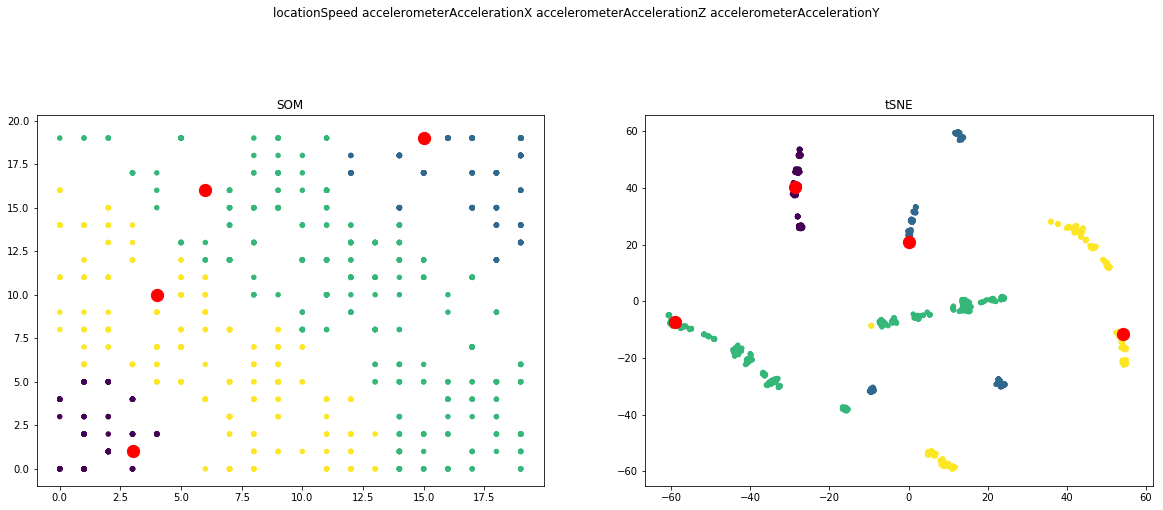

In [13]:
plt.figure(figsize=(20, 15))
title = " ".join(chosen_attributes)
plt.suptitle(title)

plt.subplot(221)
plt.scatter(som_wo_centroids[:,0],som_wo_centroids[:,1],20,labels)
plt.scatter(som_redu_centroids[:,0],som_redu_centroids[:,1],150,'r')
plt.title("SOM")

plt.subplot(222)
plt.scatter(tsne_wo_centroids[:,0],tsne_wo_centroids[:,1],20,labels)
plt.scatter(tsne_redu_centroids[:,0],tsne_redu_centroids[:,1],150,'r')
plt.title("tSNE")

plt.show()
